# WIP volume analysis reboot

Data: Rucknium

Analysis: Mitchell / Isthmus

Correspondence: isthmus@getmonero.org

## Import Libraries
(if you have any issues with the next cell, run `pip install -r requirements.txt` in your terminal to install dependencies)

In [1]:
from pathlib import Path

import matplotlib as matplotlib
import matplotlib.pyplot as plt
import pandas as pd

### Config

In [2]:
data_dir: Path = Path("/media/m/data_drive_2/monero/reboot/flood-ring-member-ages-for-isthmus.csv")

## Import data

In [3]:
if not data_dir.exists():
    raise FileNotFoundError(f"Data file not found at {data_dir}")
df = pd.read_csv(data_dir)

In [4]:
df.head().transpose()

,0,1,2,3,4
tx_hash,03356c82b7ffb865e080b43e72d3a1d3ce3d036ef9251b...,03356c82b7ffb865e080b43e72d3a1d3ce3d036ef9251b...,03356c82b7ffb865e080b43e72d3a1d3ce3d036ef9251b...,03356c82b7ffb865e080b43e72d3a1d3ce3d036ef9251b...,03356c82b7ffb865e080b43e72d3a1d3ce3d036ef9251b...
input_num,1,1,1,1,1
block_height_ring,3051991,3051991,3051991,3051991,3051991
block_timestamp_ring,1704067334,1704067334,1704067334,1704067334,1704067334
output_index,61480826.0,79876390.0,81477314.0,84034252.0,85584581.0
block_height,2716747,2969943,2991079,3022822,3039781
block_timestamp,1663763386.0,1694206976.0,1696734894.0,1700556341.0,1702590884.0


## Feature eng

In [5]:
df['output_age_blocks'] = df['block_height_ring'] - df['block_height']
df['output_age_sec'] = df['block_timestamp_ring'] - df['block_timestamp']
df['output_age_hours'] = df['output_age_sec'] / 3600
df['output_age_days'] = df['output_age_hours'] / 24

## Viz

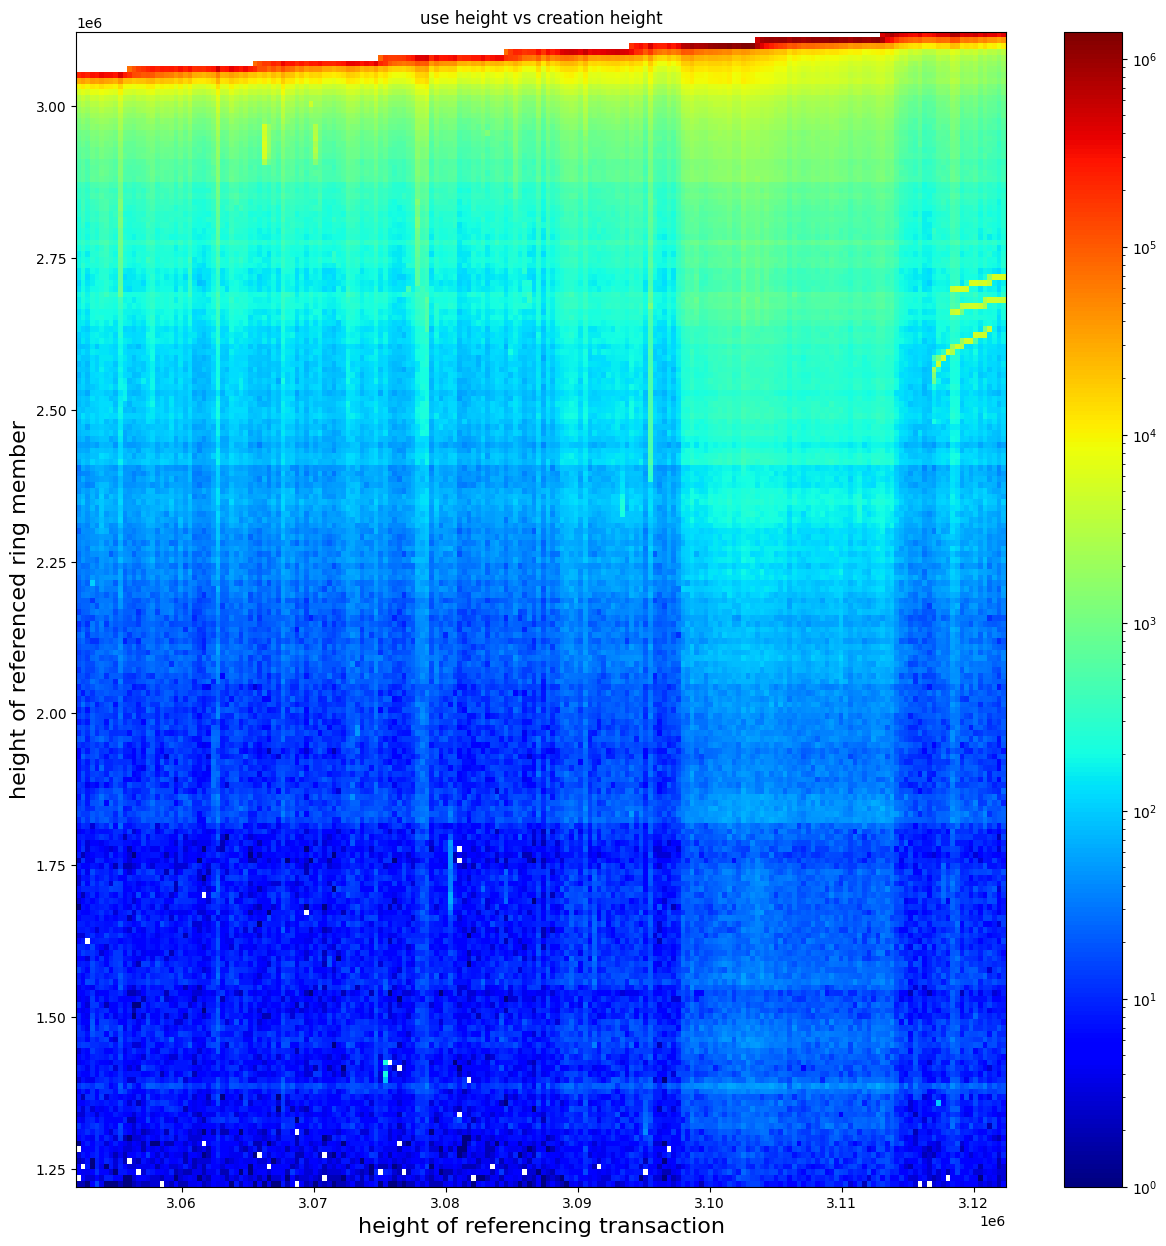

In [6]:
plt.figure(facecolor='w', figsize=(15, 15))
par = plt.hist2d(df['block_height_ring'], df['block_height'],
                 norm=matplotlib.colors.LogNorm(), cmap='jet', bins=(200, 200))
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('height of referenced ring member', size=16)
plt.title('use height vs creation height')
plt.colorbar()

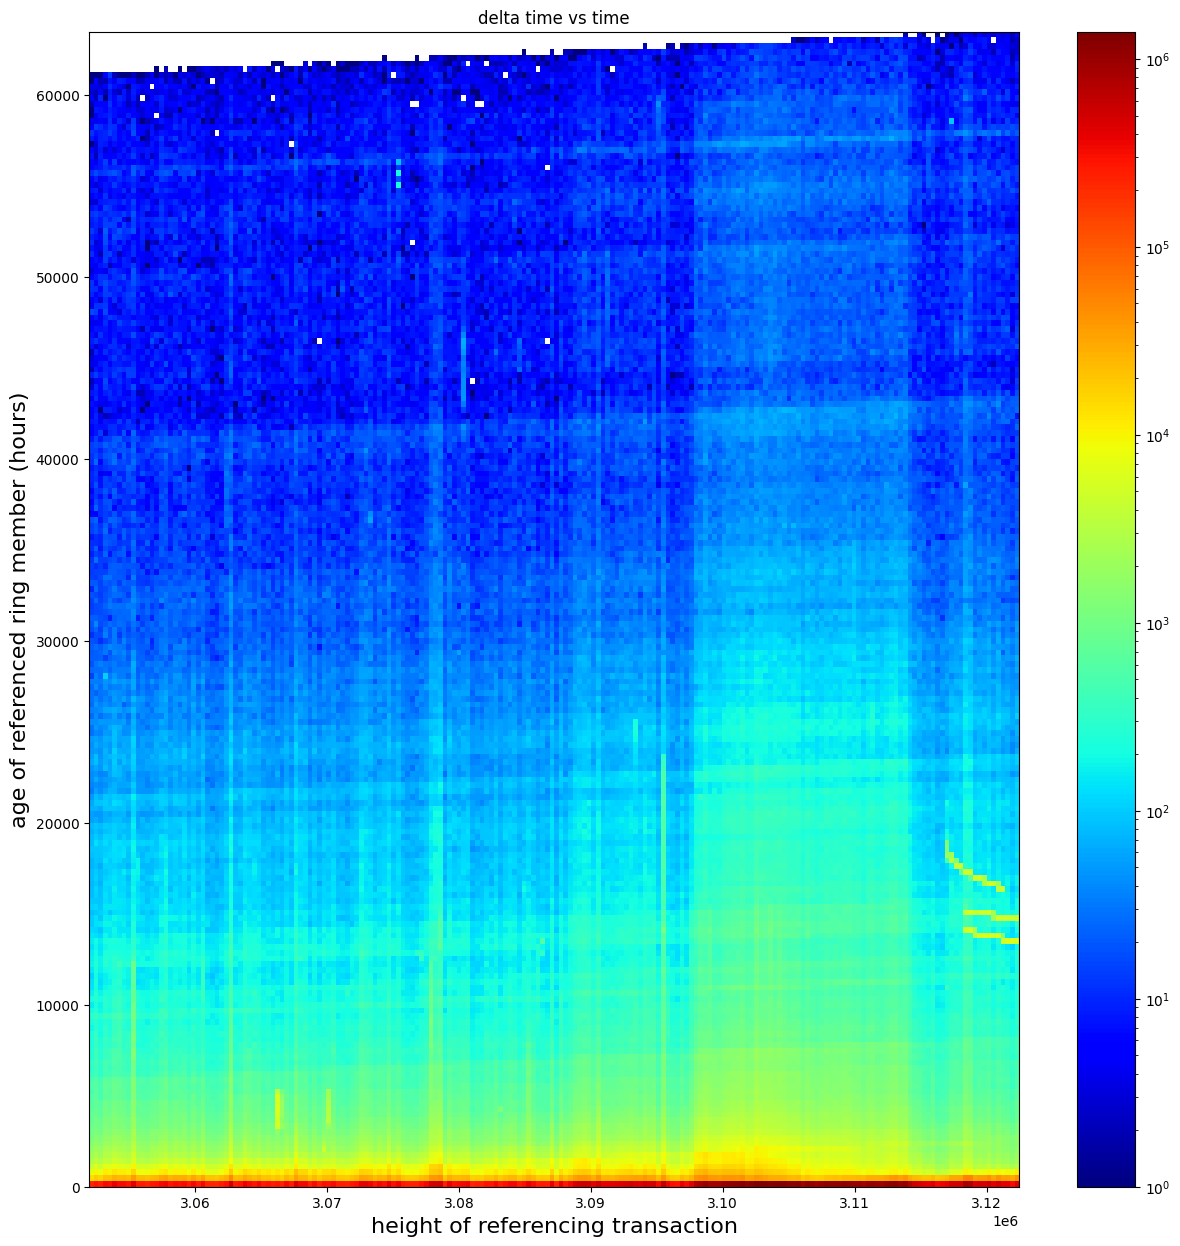

In [7]:
plt.figure(facecolor='w', figsize=(15, 15))
par = plt.hist2d(df['block_height_ring'], df['output_age_hours'],
                 norm=matplotlib.colors.LogNorm(), cmap='jet', bins=(200, 200))
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member (hours)', size=16)
plt.title('delta time vs time')
plt.colorbar()

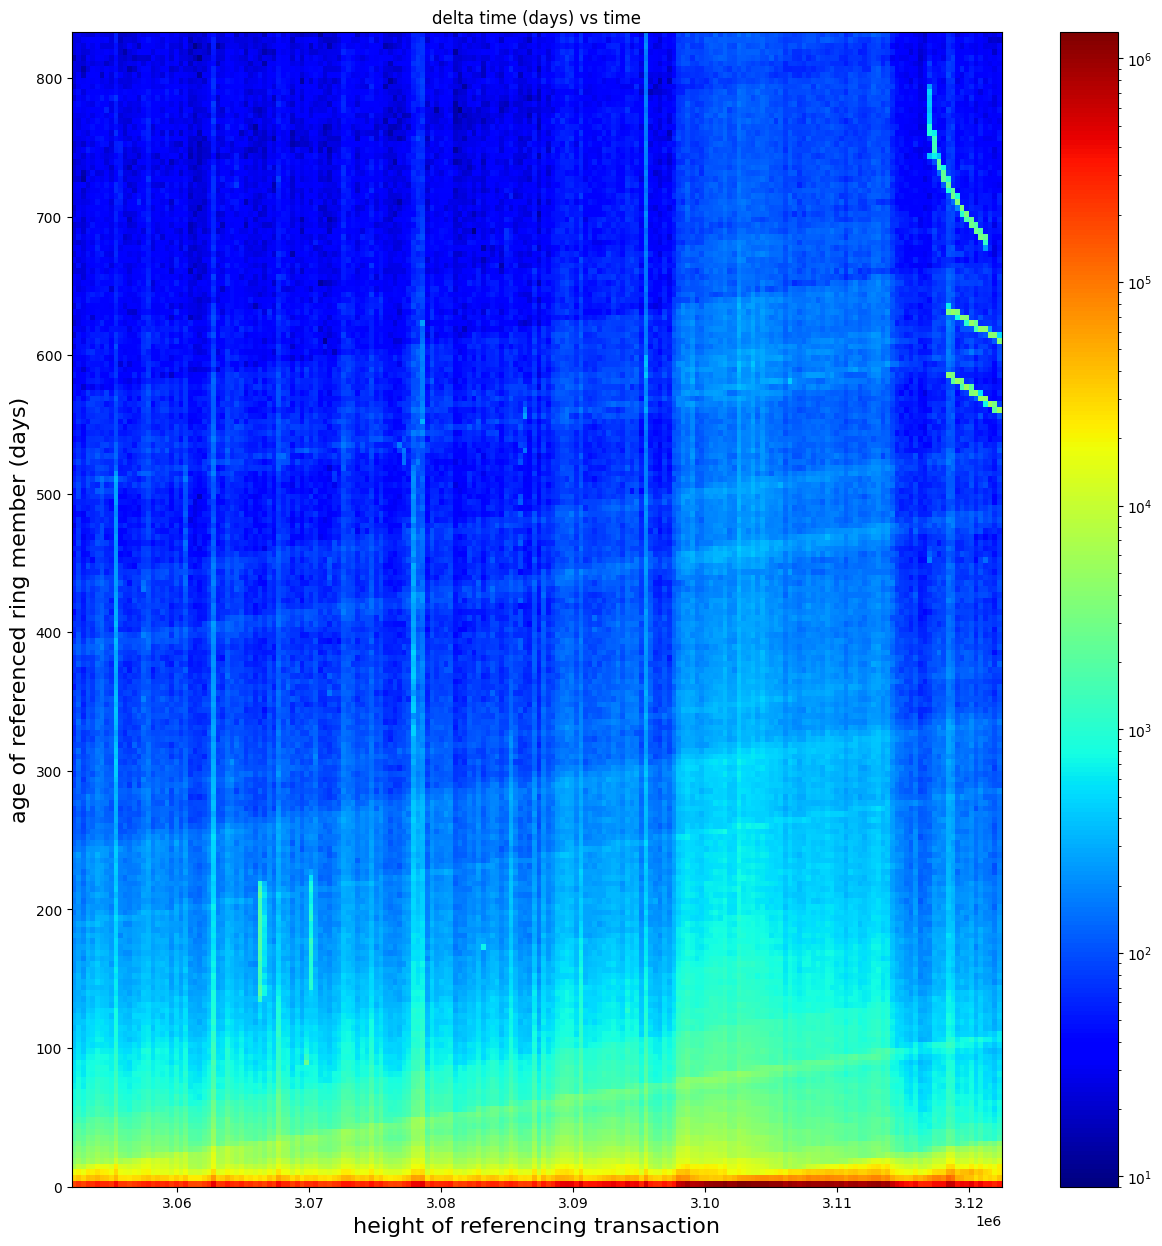

In [8]:
plt.figure(facecolor='w', figsize=(15, 15))
filter_for_df = df['output_age_days'] < 20_000 / 24
par = plt.hist2d(df['block_height_ring'][filter_for_df], df['output_age_days'][filter_for_df],
                 norm=matplotlib.colors.LogNorm(), cmap='jet', bins=(200, 200))
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member (days)', size=16)
plt.title('delta time (days) vs time')
plt.colorbar()

# LEGACY ---

In [ ]:
raise NotImplementedError("data has not yet ben adapted for legacy code below")

In [49]:
timing_data_file_path: str = os.path.join(os.path.curdir, 'csv')
timing_data_file_name: str = 'ringmember_height_flood.csv'  # Thanks @ Neptune Research
dfr = pd.read_csv(os.path.join(timing_data_file_path, timing_data_file_name))
dfr['age_member'] = dfr['source_height'] - dfr['ringmember_height']
dfr = dfr.rename(columns={"source_height": "height_sig", "ringmember_height": "height_member"})
dfr.head()

,height_sig,source_tx_index,source_vin_index,ringmember_index,height_member,age_member
0,2345000,13,1,1,2204657,140343
1,2345000,13,1,2,2342510,2490
2,2345000,13,1,3,2343048,1952
3,2345000,13,1,4,2343764,1236
4,2345000,13,1,5,2343793,1207


Visualize time vs time

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


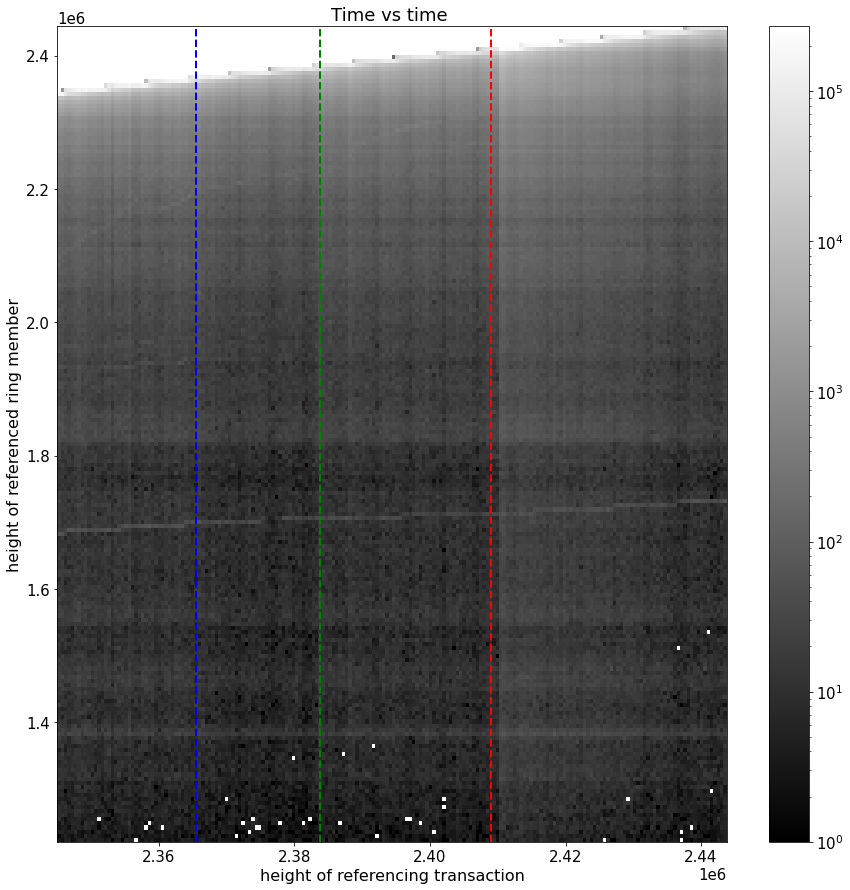

In [50]:
plt.figure(facecolor='w', figsize=(15, 15))
par = plt.hist2d(dfr['height_sig'], dfr['height_member'],
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.gray, bins=(200, 200))
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('height of referenced ring member', size=16)
plt.title('Time vs time ')
plt.colorbar()
add_lines();

Visualize age of ring members

/tmp/ipykernel_153442/3388308100.py:3: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  par = plt.hist2d(dfr['height_sig'], dfr['height_member'],


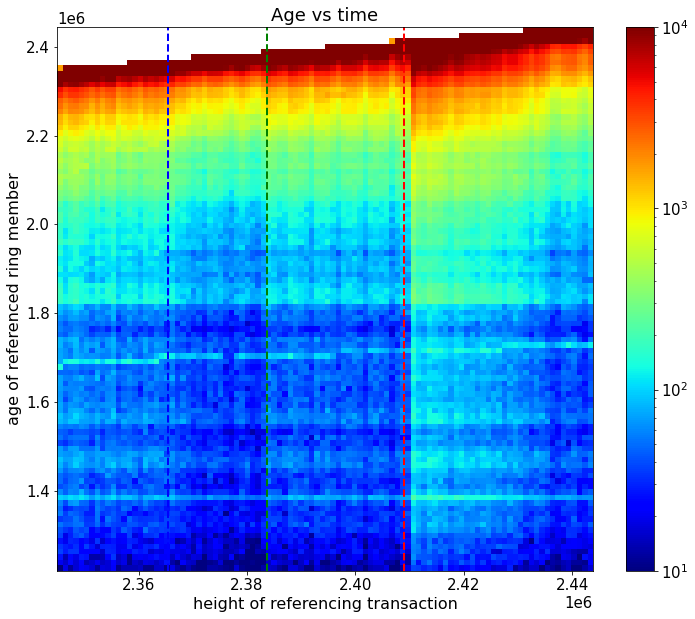

In [51]:
plt.figure(facecolor='w', figsize=(12, 10))
df_filter = (dfr['height_member'] > 0)
par = plt.hist2d(dfr['height_sig'], dfr['height_member'],
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet, bins=(100, 100), vmin=10, vmax=10 ** 4)
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member', size=16)
plt.title('Age vs time')
plt.colorbar()
add_lines();

### Normalize the data

In [52]:
def round_down(num, divisor):
    return num - (num % divisor)


# Add rounded timebase

bin_width_height: int = 720 // 4
dfr['sig_day_height'] = [round_down(x, bin_width_height) for x in dfr['height_sig']]
dfr.head()

# Get weights

bin_edges: list = list(set(dfr['sig_day_height']))
bin_edges.sort()
bin_edges.append(max(bin_edges) + bin_width_height)

# Calculate daily counts
sig_hist_counts, sig_hist_edges = np.histogram(dfr.sig_day_height, bins=bin_edges)

# Encode into a dict
counts_dict: dict = dict()
for i in range(len(sig_hist_counts)):
    counts_dict[sig_hist_edges[i]] = sig_hist_counts[i]

# Add as a column in the data frame
dfr['day_counts'] = [counts_dict[x] for x in dfr['sig_day_height']]
dfr['inverse_counts'] = [1 / x for x in dfr['day_counts']];

Now we can visualize, normalized by transaction volume, first the timing plot again (zoomed out and zoomed in)

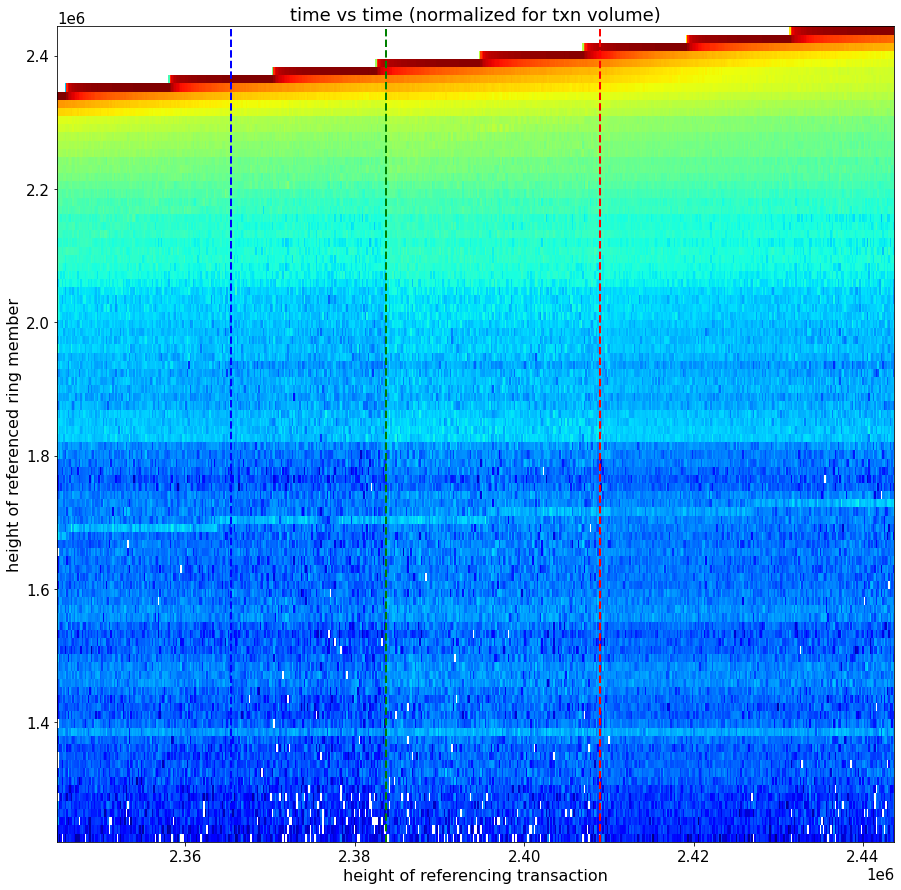

In [53]:
plt.figure(facecolor='w', figsize=(15, 15))
par = plt.hist2d(dfr['sig_day_height'], dfr['height_member'], weights=dfr['inverse_counts'],
                 bins=(len(bin_edges) - 1, 100),
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet)
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('height of referenced ring member', size=16)
plt.title('time vs time (normalized for txn volume)')
add_lines();

/tmp/ipykernel_153442/531710510.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  par = plt.hist2d(dfr['sig_day_height'], dfr['height_member'], weights=dfr['inverse_counts'],


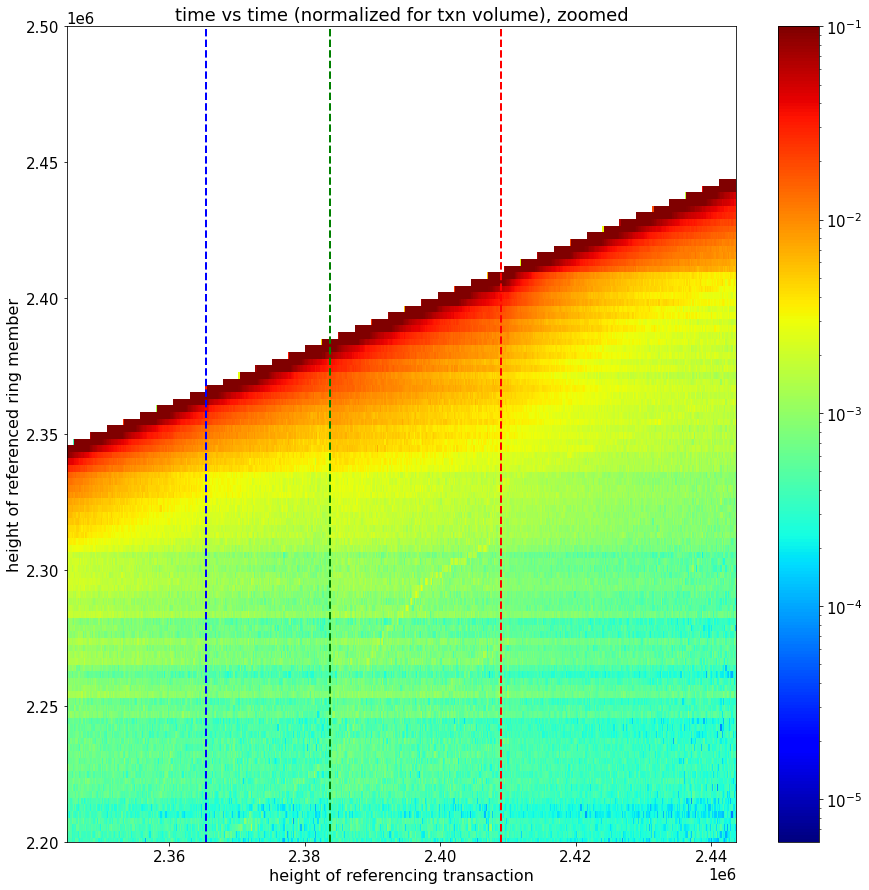

In [54]:
plt.figure(facecolor='w', figsize=(15, 15))
par = plt.hist2d(dfr['sig_day_height'], dfr['height_member'], weights=dfr['inverse_counts'],
                 bins=(len(bin_edges) - 1, 500),
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet, vmax=10 ** -1)
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('height of referenced ring member', size=16)
plt.title('time vs time (normalized for txn volume), zoomed')
plt.ylim((2.2e6, 2.5e6))
add_lines()
plt.colorbar();

We can also apply the volume normalization to the age plots (top: linear, bottom: log y-axis)

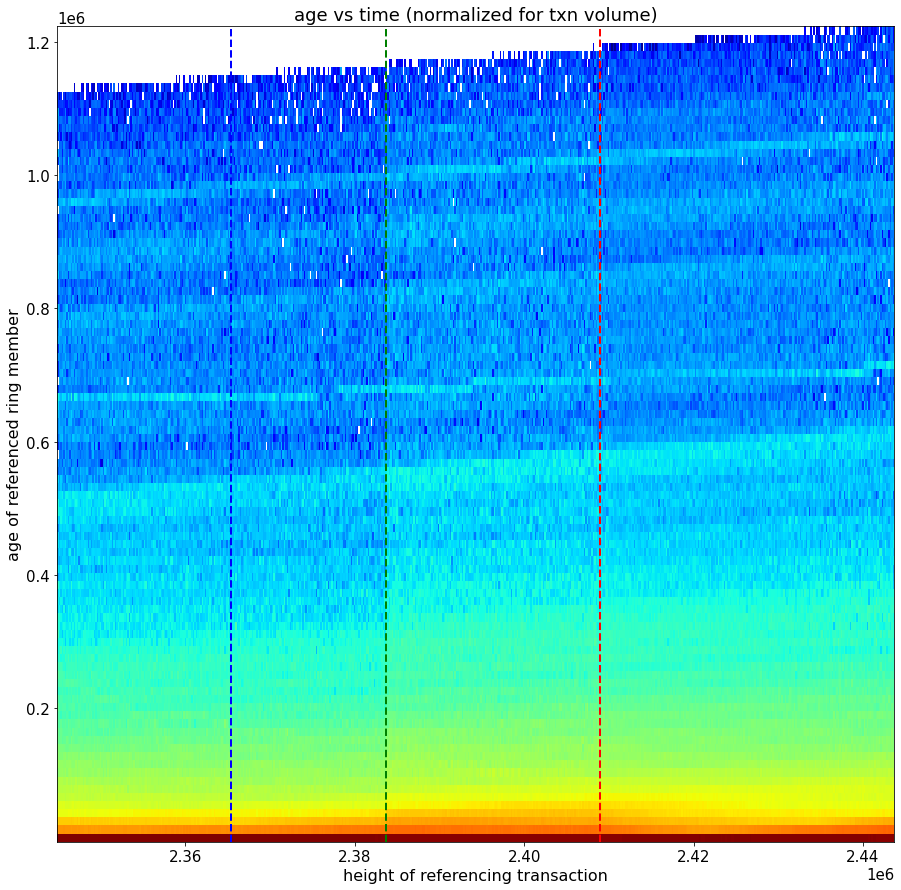

In [55]:
plt.figure(facecolor='w', figsize=(15, 15))
par = plt.hist2d(dfr['sig_day_height'], dfr['age_member'], weights=dfr['inverse_counts'],
                 bins=(len(bin_edges) - 1, 100),
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet)
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member', size=16)
plt.title('age vs time (normalized for txn volume)')
add_lines();

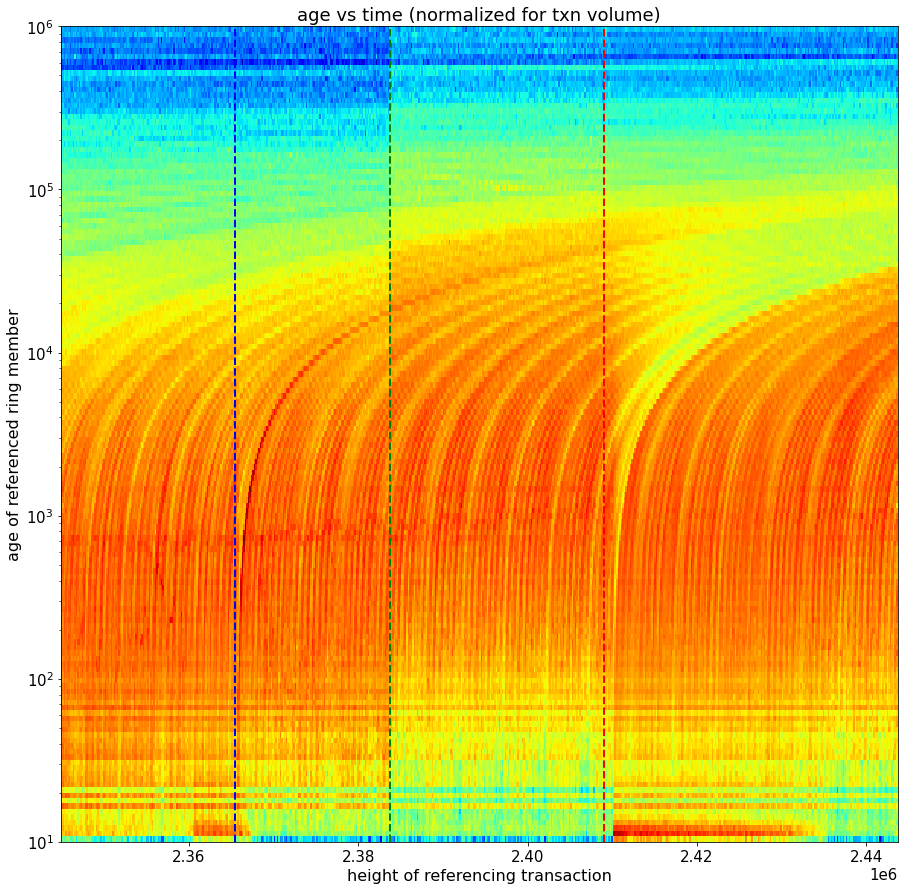

In [56]:
plt.figure(facecolor='w', figsize=(15, 15))
ybins = np.logspace(1, 6, 150)
par = plt.hist2d(dfr['sig_day_height'], dfr['age_member'], weights=dfr['inverse_counts'],
                 bins=(len(bin_edges) - 1, ybins),
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet)
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member', size=16)
plt.title('age vs time (normalized for txn volume)')
add_lines()
plt.yscale('log');

Look at young ring members before and during the anomaly (top: full scale, bottom: zoomed in for control + anomaly)

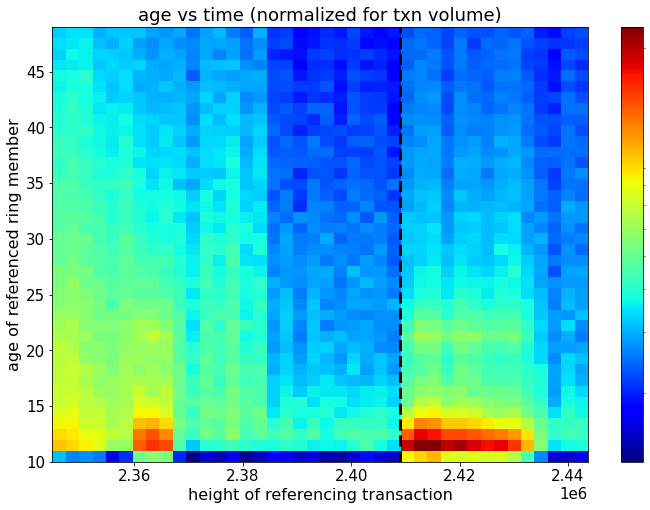

In [57]:
plt.figure(facecolor='w', figsize=(12, 8))
df_filter = (dfr['sig_day_height'] > 1.39e6) & (dfr['age_member'] < 50)
par = plt.hist2d(dfr[df_filter]['sig_day_height'], dfr[df_filter]['age_member'],
                 weights=dfr[df_filter]['inverse_counts'],
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet, bins=(40, 40))
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member', size=16)
plt.title('age vs time (normalized for txn volume)')
plt.axvline(x=excess_start_height, c='k', linewidth=3, linestyle='--')
cbar = plt.colorbar()
cbar.set_ticks([]);

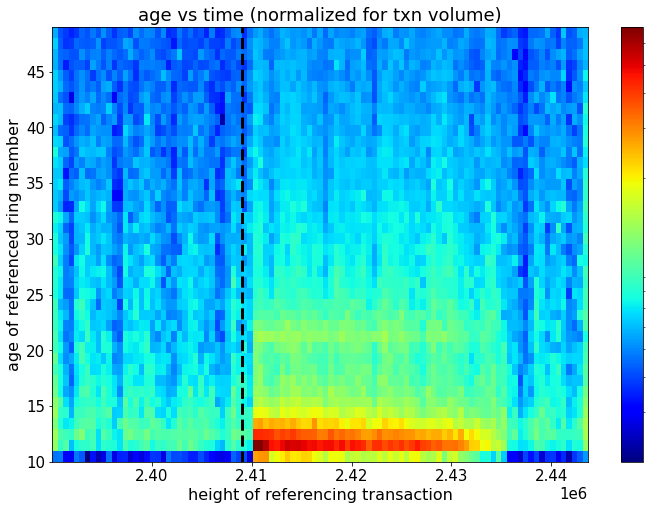

In [58]:
plt.figure(facecolor='w', figsize=(12, 8))
df_filter = (dfr['sig_day_height'] > 2.39e6) & (dfr['age_member'] < 50)
par = plt.hist2d(dfr[df_filter]['sig_day_height'], dfr[df_filter]['age_member'],
                 weights=dfr[df_filter]['inverse_counts'],
                 norm=matplotlib.colors.LogNorm(), cmap=matplotlib.cm.jet, bins=(99, 40))
plt.xlabel('height of referencing transaction', size=16)
plt.ylabel('age of referenced ring member', size=16)
plt.title('age vs time (normalized for txn volume)')
cbar = plt.colorbar()
cbar.set_ticks([])
plt.axvline(x=excess_start_height, c='k', linewidth=3, linestyle='--');